In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('logs/log_ppo.csv', names=["episode", "step", "episode_reward", "world", "level", "level_progress", "episode_length"])
df

,episode,step,episode_reward,world,level,level_progress,episode_length
0,0,417,46,1,1,343,418
1,0,468,50,1,1,347,469
2,1,1154,62,1,1,358,737
3,0,1197,484,1,1,810,1198
4,0,1279,585,1,1,941,1280
...,...,...,...,...,...,...,...
6219,378,872982,5070,1,2,363,2418
6220,376,872997,5070,1,2,363,2057
6221,377,873095,5014,1,2,306,2348
6222,390,873099,5056,1,2,349,2301


In [16]:
binned_df = df.groupby(pd.cut(df['step'], bins=range(0, 5000 * (max(df['step']) // 5000) + 5000, 5000)))['episode_reward'].mean().reset_index()
binned_df

/tmp/ipykernel_1061722/470501487.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_df = df.groupby(pd.cut(df['step'], bins=range(0, 5000 * (max(df['step']) // 5000) + 5000, 5000)))['episode_reward'].mean().reset_index()


,step,episode_reward
0,"(0, 5000]",356.057692
1,"(5000, 10000]",368.944444
2,"(10000, 15000]",326.571429
3,"(15000, 20000]",323.666667
4,"(20000, 25000]",319.956522
...,...,...
169,"(845000, 850000]",2845.400000
170,"(850000, 855000]",2788.833333
171,"(855000, 860000]",2798.264706
172,"(860000, 865000]",3321.685714


In [18]:
binned_df['step'] = binned_df['step'].map(lambda x: x.mid)

<Axes: xlabel='step', ylabel='episode_reward'>

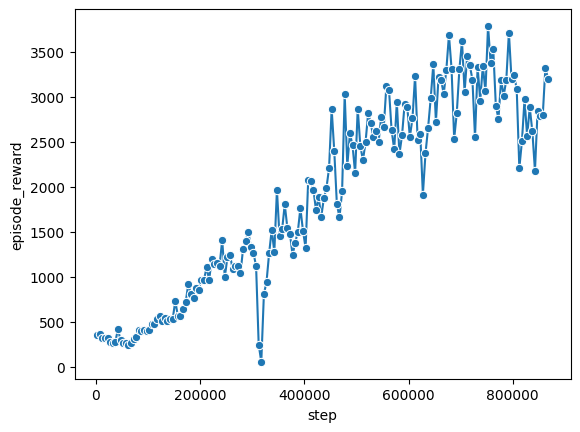

In [19]:
sns.lineplot(x='step', y='episode_reward', data=binned_df, marker='o')